<a href="https://colab.research.google.com/github/AbhaySingh71/math-statistics/blob/main/probability/probability_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#using Bayes's Theorem in python
P_coffee_drinker = .65
p_cancer = .005
p_coffee_drinker_given_cancer = .85

# Fix: Use the correct variable name here
p_cancer_given_coffee_drinker = p_coffee_drinker_given_cancer * p_cancer / P_coffee_drinker

print(p_cancer_given_coffee_drinker)

0.006538461538461539


In [2]:
# using scipy for the binomal distribution

from scipy.stats import binom

n = 10
p = 0.9

for k in range (n+1):
    probability = binom.pmf(k,n,p)
    print("{0} -{1}".format(k,probability))

0 -9.999999999999977e-11
1 -8.999999999999978e-09
2 -3.6449999999999943e-07
3 -8.747999999999991e-06
4 -0.00013778099999999974
5 -0.0014880347999999982
6 -0.011160260999999996
7 -0.05739562799999997
8 -0.1937102444999998
9 -0.38742048899999976
10 -0.3486784401000001


In [3]:
# beta distribution using scipy

from scipy.stats import beta
a=8
b= 2
p= beta.cdf(.90,a,b)
print(p)

0.7748409780000002


In [4]:
# subtracting to get a right area in a beta distribution
from scipy.stats import beta
a=8
b= 2
p= 1.0 - beta.cdf(.90,a,b)
print(p)

print("")
# a beta distribution with more trials
q=30
r=6
h=1.0 - beta.cdf(.90,q,r)
print(h)

0.22515902199999982

0.13163577484183697


In [5]:
# obtaining the area between 80 and 90
# beta distribution middle area using scipy
beta.cdf(.90,a,b) - beta.cdf(.80,a,b)

0.33863336199999994

In [ ]:
import pandas as pd

In [ ]:
import random

In [ ]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [ ]:
len(L)

10000

In [ ]:
L[:5]

[7, 10, 2, 10, 6]

In [ ]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [ ]:
import numpy as np
np.cumsum(s)

2     0.0304
3     0.0852
4     0.1651
5     0.2762
6     0.4192
7     0.5879
8     0.7289
9     0.8375
10    0.9190
11    0.9743
12    1.0000
dtype: float64

<AxesSubplot:>

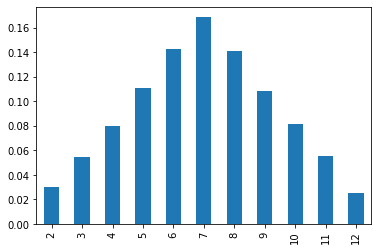

In [ ]:
s.plot(kind='bar')

<AxesSubplot:>

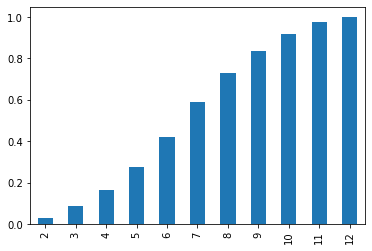

In [ ]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [ ]:
sample.mean()

50.03089373243247

(array([  5.,  23.,  91., 170., 270., 249., 140.,  43.,   8.,   1.]),
 array([33.05302216, 36.61930009, 40.18557801, 43.75185594, 47.31813387,
        50.8844118 , 54.45068973, 58.01696766, 61.58324559, 65.14952352,
        68.71580144]),
 <BarContainer object of 10 artists>)

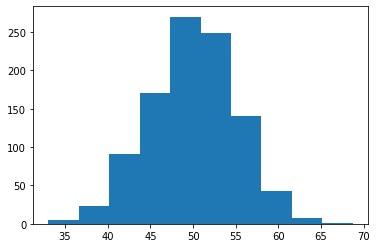

In [ ]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [ ]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [ ]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)

In [ ]:
sample.max()

68.71580144383803

In [ ]:
probabilities = [dist.pdf(value) for value in values]

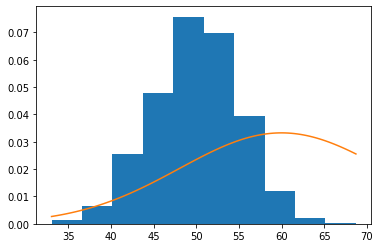

In [ ]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

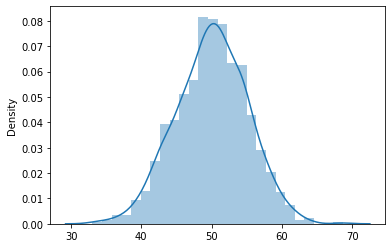

In [ ]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [ ]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [ ]:
sample

array([25.37101508, 23.17282846, 23.19266408, 21.23591442, 19.99585223,
       26.05479481, 24.87635573, 22.5707997 , 24.53847252, 17.19733365,
       15.62925657, 18.86415649, 19.00022272, 18.59746903, 13.39775335,
       14.44637505, 16.50879004, 22.05320241, 16.91522729, 24.87998461,
       25.38985776, 27.60649904, 20.60436429, 20.51424303, 16.82990467,
       16.72124091, 15.82440899, 19.21818665, 22.43898545, 19.05112432,
       21.23007028, 22.35301007, 14.54516627, 13.68508601, 21.93909454,
       16.50490442, 18.52882481, 22.6361671 , 22.06974787, 22.80384678,
       16.02872418, 14.45938868, 19.39410043, 23.67978479, 30.33476097,
       17.75143584, 18.41254234, 22.79632257, 14.69758962, 24.0195535 ,
       19.72296554, 18.34844409, 22.4203516 , 17.6989518 , 23.95721438,
       22.29306234, 13.23571722, 17.7655658 , 26.32972605, 15.46106693,
       21.51581129, 22.84867011, 19.72513232, 24.73696242, 21.79223535,
        8.22274972, 15.86279733, 20.42353259, 25.27510655, 11.79

(array([ 2.,  2.,  0.,  5.,  3.,  1.,  6.,  7., 11., 12., 21., 24., 19.,
        27., 18., 24., 26., 23., 13., 23.,  9.,  8., 11., 12., 16.,  9.,
        19., 14., 21., 46., 29., 42., 46., 65., 54., 75., 48., 50., 45.,
        32., 26., 20., 13.,  8.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 5.05186622,  6.07863826,  7.1054103 ,  8.13218234,  9.15895438,
        10.18572641, 11.21249845, 12.23927049, 13.26604253, 14.29281457,
        15.31958661, 16.34635865, 17.37313068, 18.39990272, 19.42667476,
        20.4534468 , 21.48021884, 22.50699088, 23.53376291, 24.56053495,
        25.58730699, 26.61407903, 27.64085107, 28.66762311, 29.69439514,
        30.72116718, 31.74793922, 32.77471126, 33.8014833 , 34.82825534,
        35.85502737, 36.88179941, 37.90857145, 38.93534349, 39.96211553,
        40.98888757, 42.0156596 , 43.04243164, 44.06920368, 45.09597572,
        46.12274776, 47.1495198 , 48.17629184, 49.20306387, 50.22983591,
        51.25660795, 52.28337999, 53.31015203, 54.33692407,

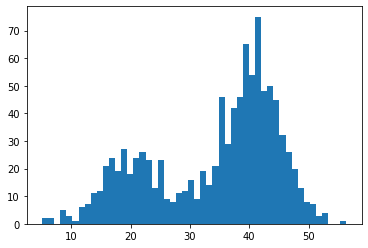

In [ ]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [ ]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [ ]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

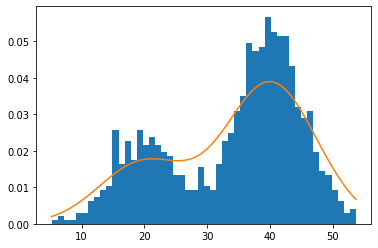

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<AxesSubplot:ylabel='Density'>

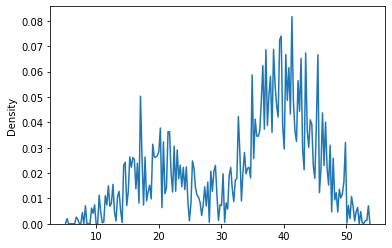

In [ ]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

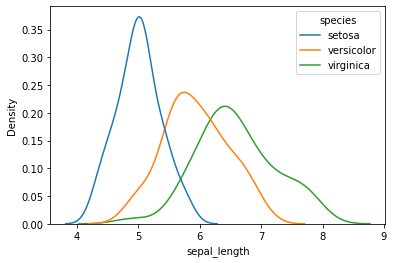

In [ ]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

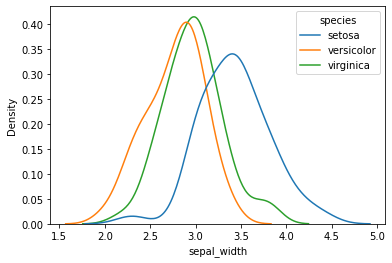

In [ ]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

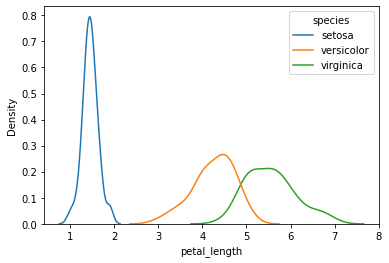

In [ ]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

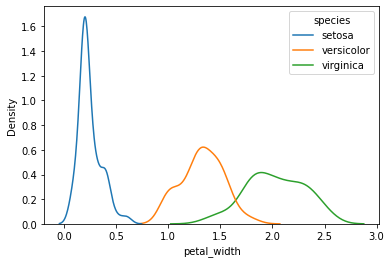

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

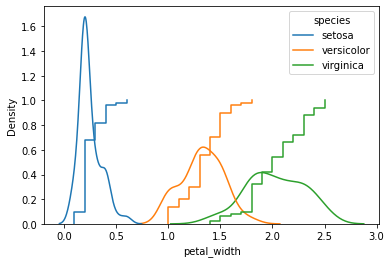

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

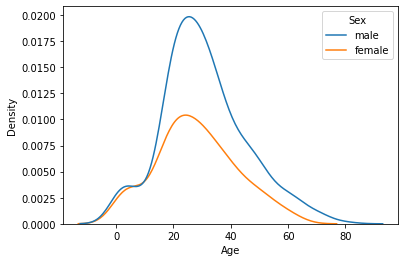

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

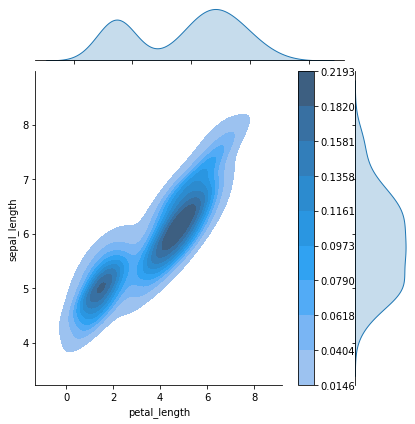

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

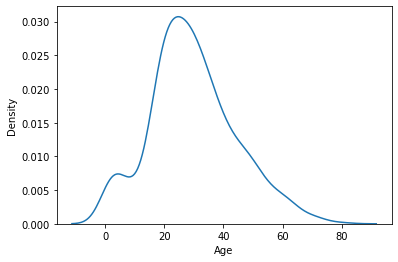

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

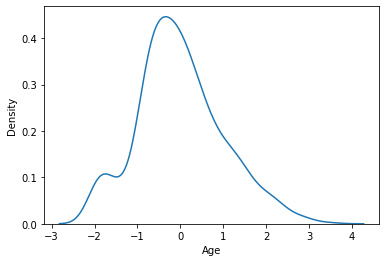

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

2.338621049070358e-16

In [ ]:
x.std()

1.0

In [ ]:
titanic['Age'].skew()

0.38910778230082704

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [ ]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
titanic['Age'].max()

80.0